In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd

In [38]:
df= pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data/ped_smooth.csv")

Text(0.5, 1.0, '13009')

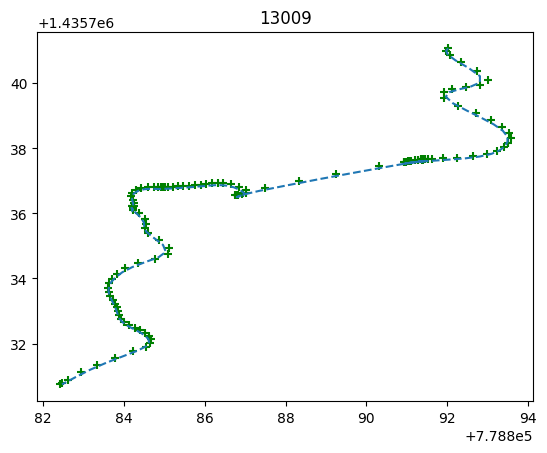

In [ ]:
track_ids=df['Track ID'].unique()
id=369
y=df[df['Track ID']==id]['Y']
x=df[df['Track ID']==id]['X']
plt.scatter(x,y,marker='+',color='green')
y=df[df['Track ID']==id]['y_smooth']
x=df[df['Track ID']==id]['x_smooth']
plt.plot(x,y,ls='--')
plt.title(id)

#6662

In [465]:
df1= pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data\car_smooth.csv").head(30000)
df2= pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data/ped_smooth.csv").head(30000)

Text(0.5, 1.0, '374,369 ')

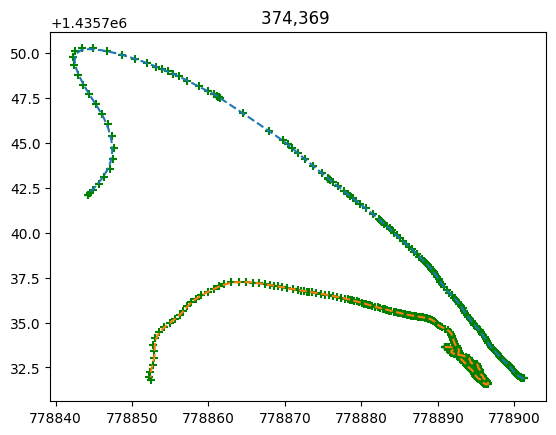

In [123]:
track_ids=df1['Track ID'].unique()
id1=374
y=df1[df1['Track ID']==id1]['Y']
x=df1[df1['Track ID']==id1]['X']
plt.scatter(x,y,marker='+',color='green')
y=df1[df1['Track ID']==id1]['y_smooth']
x=df1[df1['Track ID']==id1]['x_smooth']
plt.plot(x,y,ls='--')
track_ids=df2['Track ID'].unique()
id2=369
y=df2[df2['Track ID']==id2]['Y']
x=df2[df2['Track ID']==id2]['X']
plt.scatter(x,y,marker='+',color='green')
y=df2[df2['Track ID']==id2]['y_smooth']
x=df2[df2['Track ID']==id2]['x_smooth']
plt.plot(x,y,ls='--')
plt.title(f'{id1},{id2} ')

In [43]:
sav=df2[df2['Track ID']==4429]
sav.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/ped4429.csv")

In [152]:
# Load and clean data
df1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], errors='ignore')
df2.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], errors='ignore')

# Find overlapping Track IDs with common TimeStamps
common_pairs = []

for car_id in df1['Track ID'].unique():
    car_times = set(df1[df1['Track ID'] == car_id]['TimeStamp'])
    
    for ped_id in df2['Track ID'].unique():
        ped_times = set(df2[df2['Track ID'] == ped_id]['TimeStamp'])
        
        if car_times & ped_times:  # If timestamps overlap
            common_pairs.append((car_id, ped_id))



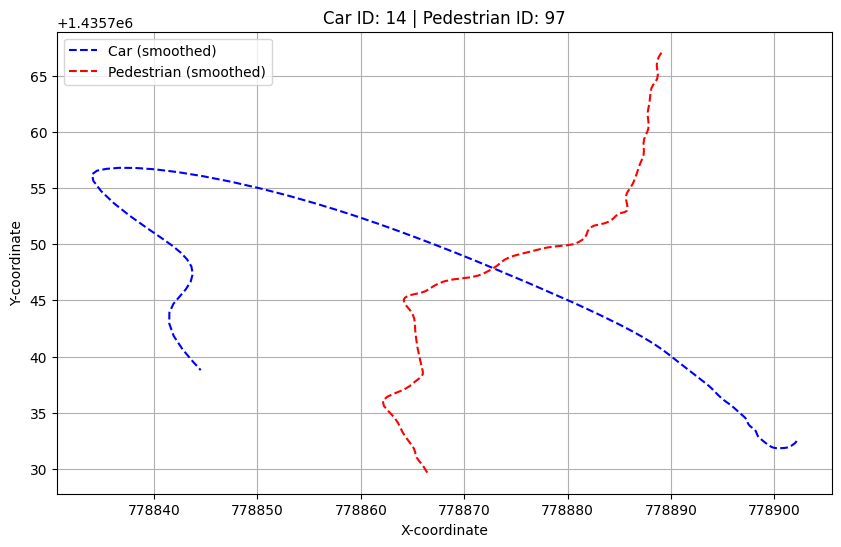

In [158]:
# Randomly select a valid pair
if common_pairs:
    car_id, ped_id = common_pairs[np.random.choice(len(common_pairs))]
else:
    raise ValueError("No overlapping car-pedestrian tracks found!")

car_data = df1[df1['Track ID'] == 191]
ped_data = df2[df2['Track ID'] == 292]

# Plot
plt.figure(figsize=(10, 6))
# plt.scatter(car_data['X'], car_data['Y'], marker='+', color='blue', label='Car (raw)')
plt.plot(car_data['x_smooth'], car_data['y_smooth'], 'b--', label='Car (smoothed)')
# plt.scatter(ped_data['X'], ped_data['Y'], marker='x', color='red', label='Pedestrian (raw)')
plt.plot(ped_data['x_smooth'], ped_data['y_smooth'], 'r--', label='Pedestrian (smoothed)')

plt.title(f"Car ID: {car_id} | Pedestrian ID: {ped_id}")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
sav=df1[df1['Track ID']==319]
sav.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/car319.csv")

In [159]:

from scipy.spatial import cKDTree

# Load the data
df_car = pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/car319.csv")
df_ped = pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp\ped382.csv")

# Distance threshold in meters
THRESHOLD = 5.0

# Get coordinates as numpy arrays
car_points = df_car[['x_smooth', 'y_smooth']].values
ped_points = df_ped[['x_smooth', 'y_smooth']].values

# Build KDTree for pedestrian points
ped_tree = cKDTree(ped_points)

# Find all car points within threshold distance of any pedestrian point
distances, indices = ped_tree.query(car_points, distance_upper_bound=THRESHOLD)

# Get the close encounters
close_encounters = []
for i, (dist, ped_idx) in enumerate(zip(distances, indices)):
    if dist < THRESHOLD:
        # Car point
        close_encounters.append({
            'Type': 'Car',
            'x_smooth': car_points[i][0],
            'y_smooth': car_points[i][1],
            'Distance': dist
        })
        
        # Corresponding pedestrian point
        close_encounters.append({
            'Type': 'Pedestrian', 
            'x_smooth': ped_points[ped_idx][0],
            'y_smooth': ped_points[ped_idx][1],
            'Distance': dist
        })

# Create DataFrame
results_df = pd.DataFrame(close_encounters)

# Save to CSV if needed
# results_df.to_csv("close_encounters.csv", index=False)

# Show results
print(f"Found {len(results_df)//2} close encounters (distance < {THRESHOLD}m)")
print(results_df)

Found 114 close encounters (distance < 5.0m)
           Type       x_smooth      y_smooth  Distance
0           Car  778899.760000  1.435733e+06  2.961671
1    Pedestrian  778896.858054  1.435733e+06  2.961671
2           Car  778899.750000  1.435733e+06  2.951873
3    Pedestrian  778896.858054  1.435733e+06  2.951873
4           Car  778899.746666  1.435733e+06  2.948606
..          ...            ...           ...       ...
223  Pedestrian  778892.810459  1.435747e+06  3.647696
224         Car  778888.737569  1.435747e+06  4.149773
225  Pedestrian  778892.839336  1.435747e+06  4.149773
226         Car  778888.364878  1.435748e+06  4.695513
227  Pedestrian  778892.839336  1.435747e+06  4.695513

[228 rows x 4 columns]


In [466]:
# Parameters
min_stop_duration = 1.0  # seconds
speed_threshold = 0.2  # m/s (adjust based on sensor noise)

# 1. Calculate time differences within each track
df1['time_diff'] = df1.groupby('Track ID')['TimeStamp'].diff()

# 2. Identify stop segments (where speed < threshold)
df1['is_stopped'] = df1['speed'] < speed_threshold

# 3. Group consecutive stops and calculate cumulative stop duration
stop_groups = (df1['is_stopped'] != df1['is_stopped'].shift()).cumsum()
df1['stop_duration'] = df1.groupby(['Track ID', stop_groups])['time_diff'].cumsum()

# 4. Filter out only sustained stops (>1 second)
filtered_df = df1[~((df1['is_stopped']) & (df1['stop_duration'] >= min_stop_duration))]

print(f"Original rows: {len(df1)}")
print(f"Filtered rows: {len(filtered_df)}")
df1= filtered_df

Original rows: 30000
Filtered rows: 16162


In [467]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
common_pairs = []

for car_id in df1['Track ID'].unique():
    car_times = set(df1[df1['Track ID'] == car_id]['TimeStamp'])
    
    for ped_id in df2['Track ID'].unique():
        ped_times = set(df2[df2['Track ID'] == ped_id]['TimeStamp'])
        
        if car_times & ped_times:  # If timestamps overlap
            common_pairs.append((car_id, ped_id))

In [478]:
while 1>0:
    if common_pairs:
        car_id, ped_id = common_pairs[np.random.choice(len(common_pairs))]
    else:
        raise ValueError("No overlapping car-pedestrian tracks found!")

    car_data = df1[df1['Track ID'] == car_id]
    ped_data = df2[df2['Track ID'] == ped_id]

    # car_data = df1[df1['Track ID'] == 191]
    # ped_data = df2[df2['Track ID'] == 292]

    df_car = car_data
    df_ped = ped_data


    DIST_THRESH = 2.5  # meters
    TIME_THRESH = 0.2   # seconds

    # Prepare data - ensure these columns exist in your data
    car_data = df_car[['Track ID', 'x_smooth', 'y_smooth', 'TimeStamp']].values
    ped_data = df_ped[['Track ID', 'x_smooth', 'y_smooth', 'TimeStamp']].values

    # Build KDTree for pedestrian points
    ped_tree = cKDTree(ped_data[:, 1:3])  # Use only X,Y coordinates

    # Find all close encounters
    close_encounters = []
    for i, car in enumerate(car_data):
        car_id, car_x, car_y, car_time = car
        dist, ped_idx = ped_tree.query([car_x, car_y], distance_upper_bound=DIST_THRESH)
        
        if dist < DIST_THRESH:
            ped_id, ped_x, ped_y, ped_time = ped_data[ped_idx]
            time_diff = abs(car_time - ped_time)
            
            if time_diff <= TIME_THRESH:
                close_encounters.append({
                    'Car_Track_ID': car_id,
                    'Ped_Track_ID': ped_id,
                    'Car_X': car_x,
                    'Car_Y': car_y,
                    'Car_Time': car_time,
                    'Ped_X': ped_x,
                    'Ped_Y': ped_y,
                    'Ped_Time': ped_time,
                    'Distance': dist,
                    'Time_Difference': car_time*1000
                })

    # Convert to DataFrame
    results_df = pd.DataFrame(close_encounters)

    # Save and display results
    if not results_df.empty:
        # results_df.to_csv("dangerous_encounters.csv", index=False)
        print(f"Found {len(results_df)} dangerous encounters:")
        print(results_df[['Car_Track_ID', 'Ped_Track_ID', 'Distance', 'Time_Difference']].head())
        break
    # else:
        # print("No dangerous encounters found")

Found 3 dangerous encounters:
   Car_Track_ID  Ped_Track_ID  Distance  Time_Difference
0        2161.0        2061.0  1.280807         755760.0
1        2161.0        2061.0  1.288956         755920.0
2        2161.0        2061.0  1.313359         756080.0


In [4]:
import pandas as pd
import glob

files = glob.glob(r"D:\T\test_codeEVT\nd\*.csv")

merged_df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
merged_df['speed']=merged_df['speed']=((merged_df['vx_smooth']**2+merged_df['vy_smooth']**2)**0.5)
merged_df.to_csv(r"D:\T\test_codeEVT\nd/merged_data.csv", index=False)

In [1]:
import pandas as pd
import glob

files = glob.glob(r"D:\T\test_codeEVT\ATTC_Data\*.csv")

merged_df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
# merged_df['speed']=merged_df['speed']=((merged_df['vx_smooth']**2+merged_df['vy_smooth']**2)**0.5)
merged_df.to_csv(r"D:\T\test_codeEVT\ATTC_Data/merged_data_ATTC.csv", index=False)

In [5]:
rawdf=pd.read_csv(r"D:\T\test_codeEVT\dataset\Majestic.csv")
print(len(merged_df)/len(rawdf))

0.9767440583790482


# Results:
- the total Data Loss after applying K_Filter and Row deletion was found to be 2.33 %
- all the road user trijectories are now corrected for velocity thresholds.
- avg velocities of almost 95% vehicals were also below avg velocities that are most probable to be observed

In [ ]:
df1= pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data/ped_smooth.csv")
df2= pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data\car_smooth.csv")
pedid= df1[df1['Track ID']==292]
carid=df2[df2['Track ID']==191]
min_stop_duration = 1.0  # seconds
speed_threshold = 0.2  # m/s (adjust based on sensor noise)
carid['time_diff'] = carid.groupby('Track ID')['TimeStamp'].diff()
carid['is_stopped'] = carid['speed'] < speed_threshold
stop_groups = (carid['is_stopped'] != carid['is_stopped'].shift()).cumsum()
carid['stop_duration'] = carid.groupby(['Track ID', stop_groups])['time_diff'].cumsum()
filtered_df = carid[~((carid['is_stopped']) & (carid['stop_duration'] >= min_stop_duration))]

C:\Users\Tusha\AppData\Local\Temp\ipykernel_10272\1919506845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carid['time_diff'] = carid.groupby('Track ID')['TimeStamp'].diff()
C:\Users\Tusha\AppData\Local\Temp\ipykernel_10272\1919506845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carid['is_stopped'] = carid['speed'] < speed_threshold
C:\Users\Tusha\AppData\Local\Temp\ipykernel_10272\1919506845.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [479]:
df1= pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data/ped_smooth.csv")
df2= pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data\car_smooth.csv")
pedid= df1[df1['Track ID']==341]
carid=df2[df2['Track ID']==191]

ped = pedid
car = filtered_df

# Find common timestamps
common_timestamps = set(ped['TimeStamp']).intersection(set(car['TimeStamp']))

# Convert to sorted list
common_timestamps = sorted(common_timestamps)

# Display results
print(f"Found {len(common_timestamps)} common timestamps:")
for ts in common_timestamps:
    print(ts)

Found 0 common timestamps:


In [120]:

target_time = 109.84

# Check existence
ped_exists = not ped[ped['TimeStamp'] == target_time].empty
car_exists = not car[car['TimeStamp'] == target_time].empty

print(f"Timestamp {target_time} exists in:")
print(f"- Pedestrian data: {'Yes' if ped_exists else 'No'}")
print(f"- Car data: {'Yes' if car_exists else 'No'}")

if ped_exists and car_exists:
    # Get coordinates
    ped_point = ped[ped['TimeStamp'] == target_time].iloc[0]
    car_point = car[car['TimeStamp'] == target_time].iloc[0]
    
    print("\nCoordinates:")
    print(f"Pedestrian (x,y): ({ped_point['x_smooth']:.2f}, {ped_point['y_smooth']:.2f})")
    print(f"Car (x,y): ({car_point['x_smooth']:.2f}, {car_point['y_smooth']:.2f})")
    
    # Calculate separation
    separation = np.sqrt(
        (car_point['x_smooth'] - ped_point['x_smooth'])**2 +
        (car_point['y_smooth'] - ped_point['y_smooth'])**2
    )
    print(f"\nSeparation at {target_time}: {separation:.2f} meters")
else:
    print("\nCannot calculate separation - missing data for one or both objects")

Timestamp 109.84 exists in:
- Pedestrian data: Yes
- Car data: Yes

Coordinates:
Pedestrian (x,y): (778874.34, 1435748.82)
Car (x,y): (778881.92, 1435744.23)

Separation at 109.84: 8.86 meters


In [ ]:
angles = []
for i in pedid['TimeStamp']:
    veh_pp = carid[carid['TimeStamp'] == i]
    ped_pp = pedid[pedid['TimeStamp'] == i]
    
    if not veh_pp.empty and not ped_pp.empty:
        VehLong = veh_pp['vx_smooth'].iloc[0]
        Vehlat = veh_pp['vy_smooth'].iloc[0]
        Pedlong = ped_pp['vx_smooth'].iloc[0]
        Pedlat = ped_pp['vy_smooth'].iloc[0]
        
        angle = math.degrees(math.atan2(Vehlat*Pedlong - VehLong*Pedlat, 
                                      VehLong*Pedlong + Vehlat*Pedlat))
        angles.append(angle)
    else:
        angles.append(None)  # or some default value

print(angles)

[-93.59094180935963, -93.59094180935963, -101.77553247283086, -120.21755805738098, -134.21748819104232, -134.227342984801, -115.41249576480755, -93.70849072983567, -88.37281693878018, -97.93718808213397, -111.77905122564728, -120.99981929938038, -122.19393073873798, -118.73215187767472, -113.52054419166701, -117.57832130680737, -128.13692505100073, -135.36146452205105, -131.55995582472062, -118.15921044173376, -104.69079051295317, -100.12844833754423, -105.08795933779265, -118.20234387456463, -128.7525880056302, -131.8171730125448, 97.63419613110699, -70.61462453391823, -106.95282079664666, -103.37461487641443, -105.29980752426674, -108.01235825413033, -110.61707485354954, -109.2287122505881, -107.366459670575, -104.02021177588753, -99.73236397259298, -92.23054914880092, -92.38904960439193, -92.27613852186997, -96.61821705919404, -106.67252676755056, -115.57635053014731, -129.67285786772402, -137.11940161132327, -138.77383559273298, -131.77285628058803, -111.76826990529334, -77.6859222

In [480]:
import pandas as pd
import numpy as np
import math
df1= pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data/ped_smooth.csv")
df2= pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data\car_smooth.csv")
pedid= df1[df1['Track ID']==292]
carid=df2[df2['Track ID']==191]
min_stop_duration = 1.0  # seconds
speed_threshold = 0.2  # m/s (adjust based on sensor noise)
carid['time_diff'] = carid.groupby('Track ID')['TimeStamp'].diff()
carid['is_stopped'] = carid['speed'] < speed_threshold
stop_groups = (carid['is_stopped'] != carid['is_stopped'].shift()).cumsum()
carid['stop_duration'] = carid.groupby(['Track ID', stop_groups])['time_diff'].cumsum()
filtered_df = carid[~((carid['is_stopped']) & (carid['stop_duration'] >= min_stop_duration))]


ped = pedid
car = filtered_df

TIME_BUFFER = 0.10  
DIST_THRESH = 8   

conflicts = []

for _, ped_row in ped.iterrows():
    
    time_window = (ped_row['TimeStamp'] - TIME_BUFFER, 
                   ped_row['TimeStamp'] + TIME_BUFFER)
    car_matches = car[car['TimeStamp'].between(*time_window)]
    
    for _, car_row in car_matches.iterrows():
        # Calculate distance
        distance = np.hypot(car_row['x_smooth'] - ped_row['x_smooth'],
                            car_row['y_smooth'] - ped_row['y_smooth'])
        
        if distance <= DIST_THRESH:
            # Calculate collision angle
            angle = math.degrees(math.atan2(
                car_row['vy_smooth']*ped_row['vx_smooth'] - car_row['vx_smooth']*ped_row['vy_smooth'],
                car_row['vx_smooth']*ped_row['vx_smooth'] + car_row['vy_smooth']*ped_row['vy_smooth']
            ))
            conflict_type = 'Lateral' if abs(angle) > 45 else 'Head-on'
            
            conflicts.append({
                'Ped_Time': ped_row['TimeStamp'],
                'Car_Time': car_row['TimeStamp'],
                'Time_Diff': car_row['TimeStamp'] - ped_row['TimeStamp'],
                'Distance': distance,
                'Angle': angle,
                'Type': conflict_type,
                'Ped_X': ped_row['x_smooth'],
                'Ped_Y': ped_row['y_smooth'],
                'Car_X': car_row['x_smooth'],
                'Car_Y': car_row['y_smooth']
            })

# Create results DataFrame
results = pd.DataFrame(conflicts)

if not results.empty:
    print(f"Found {len(results)} conflict points (±{TIME_BUFFER}s, ≤{DIST_THRESH}m):")
    print(results[['Ped_Time', 'Car_Time', 'Time_Diff', 'Distance', 'Angle', 'Type']].tail(30))
    # results.to_csv("conflict_points.csv", index=False)
else:
    print(f"No conflicts found (±{TIME_BUFFER}s, ≤{DIST_THRESH}m)")

Found 17 conflict points (±0.1s, ≤8m):
    Ped_Time  Car_Time  Time_Diff  Distance      Angle     Type
0     110.32    110.32        0.0  7.549331 -58.809458  Lateral
1     110.48    110.48        0.0  7.128099 -53.809474  Lateral
2     110.64    110.64        0.0  6.668316 -49.313748  Lateral
3     110.80    110.80        0.0  6.218281 -47.448959  Lateral
4     110.96    110.96        0.0  6.048931 -41.715318  Head-on
5     111.12    111.12        0.0  6.315765 -34.099484  Head-on
6     111.28    111.28        0.0  6.976541 -27.798296  Head-on
7     111.44    111.44        0.0  7.856590 -58.016193  Lateral
8     112.08    112.08        0.0  7.994173 -53.357372  Lateral
9     112.24    112.24        0.0  7.368130 -49.444765  Lateral
10    112.40    112.40        0.0  6.838431 -38.751862  Head-on
11    112.56    112.56        0.0  6.285804 -31.839611  Head-on
12    112.72    112.72        0.0  5.680076 -32.017062  Head-on
13    112.88    112.88        0.0  5.291192 -36.762139  Head-on
1

C:\Users\Tusha\AppData\Local\Temp\ipykernel_10272\1818813049.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carid['time_diff'] = carid.groupby('Track ID')['TimeStamp'].diff()
C:\Users\Tusha\AppData\Local\Temp\ipykernel_10272\1818813049.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carid['is_stopped'] = carid['speed'] < speed_threshold
C:\Users\Tusha\AppData\Local\Temp\ipykernel_10272\1818813049.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

# approach no 2

In [13]:
import pandas as pd
import numpy as np
import math

# Load data
df1 = pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data/ped_smooth.csv")
df2 = pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data\car_smooth.csv")

# Filter specific IDs
pedid = df1[df1['Track ID'] == 382]
carid = df2[df2['Track ID'] == 374]

# Filter stopped vehicles
min_stop_duration = 1.0  # seconds
speed_threshold = 0.2  # m/s
carid['time_diff'] = carid.groupby('Track ID')['TimeStamp'].diff()
carid['is_stopped'] = carid['speed'] < speed_threshold
stop_groups = (carid['is_stopped'] != carid['is_stopped'].shift()).cumsum()
carid['stop_duration'] = carid.groupby(['Track ID', stop_groups])['time_diff'].cumsum()
filtered_df = carid[~((carid['is_stopped']) & (carid['stop_duration'] >= min_stop_duration))]

ped = pedid
car = filtered_df

TIME_BUFFER = 0.10  
DIST_THRESH = 8   

conflicts = []

for _, ped_row in ped.iterrows():
    time_window = (ped_row['TimeStamp'] - TIME_BUFFER, 
                   ped_row['TimeStamp'] + TIME_BUFFER)
    car_matches = car[car['TimeStamp'].between(*time_window)]
    
    for _, car_row in car_matches.iterrows():
        # Calculate distance
        distance = np.hypot(car_row['x_smooth'] - ped_row['x_smooth'],
                            car_row['y_smooth'] - ped_row['y_smooth'])
        
        if distance <= DIST_THRESH:
            # Calculate relative position vector (from car to pedestrian)
            rel_pos_x = ped_row['x_smooth'] - car_row['x_smooth']
            rel_pos_y = ped_row['y_smooth'] - car_row['y_smooth']
            
            # Car velocity vector
            vel_x = car_row['vx_smooth']
            vel_y = car_row['vy_smooth']
            
            # Calculate angle between vectors (0-180 degrees)
            dot_product = rel_pos_x * vel_x + rel_pos_y * vel_y
            cross_product = rel_pos_x * vel_y - rel_pos_y * vel_x
            magnitude_p = np.hypot(rel_pos_x, rel_pos_y)
            magnitude_v = np.hypot(vel_x, vel_y)
            
            if magnitude_p == 0 or magnitude_v == 0:
                continue  # avoid division by zero
                
            cos_theta = dot_product / (magnitude_p * magnitude_v)
            theta_rad = math.acos(np.clip(cos_theta, -1, 1))  # handle floating point errors
            theta_deg = math.degrees(theta_rad)
            
            # Adjust angle based on cross product sign for direction
            if cross_product < 0:
                theta_deg = 360 - theta_deg
            
            # Classify conflict type
            if theta_deg <= 45 or theta_deg > 315:
                conflict_type = 'Head-on'
            elif theta_deg > 135 and theta_deg <= 225:
                conflict_type = 'Rear'
            else:
                # Determine left/right for lateral conflicts
                if 45 < theta_deg <= 135:
                    conflict_type = 'Lateral (Right)'
                else:
                    conflict_type = 'Lateral (Left)'
            
            conflicts.append({
                'Ped_Time': ped_row['TimeStamp'],
                'Car_Time': car_row['TimeStamp'],
                'Time_Diff': car_row['TimeStamp'] - ped_row['TimeStamp'],
                'Distance': distance,
                'Angle': theta_deg,
                'Type': conflict_type,
                'Ped_X': ped_row['x_smooth'],
                'Ped_Y': ped_row['y_smooth'],
                'Car_X': car_row['x_smooth'],
                'Car_Y': car_row['y_smooth'],
                'Car_Vx': vel_x,
                'Car_Vy': vel_y,
                'Rel_Pos_X': rel_pos_x,
                'Rel_Pos_Y': rel_pos_y
            })

# Create results DataFrame
results = pd.DataFrame(conflicts)

if not results.empty:
    print(f"Found {len(results)} conflict points (±{TIME_BUFFER}s, ≤{DIST_THRESH}m):")
    print(results[['Ped_Time', 'Car_Time', 'Distance', 'Angle', 'Type']].tail(30))
    
    # Print summary statistics
    print("\nConflict Type Summary:")
    print(results['Type'].value_counts())
    
    # Optional: Save to CSV
    # results.to_csv("conflict_points_with_angles.csv", index=False)
else:
    print(f"No conflicts found (±{TIME_BUFFER}s, ≤{DIST_THRESH}m)")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Tusha\\Visual Studio Codes\\test_codeEVT\\smoothen_data/ped_smooth.csv'

# Approach 3 bounding boxes

In [491]:
import pandas as pd
import numpy as np
import math
from scipy.spatial.distance import cdist

# Load data
df1 = pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data/ped_smooth.csv")
df2 = pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\smoothen_data\car_smooth.csv")

# Filter specific IDs 2116    2161
ped = df1[df1['Track ID'] == 2116]
car = df2[df2['Track ID'] == 2161]

# Calculate heading angles from velocity vectors (in degrees)
def calculate_heading(vx, vy):
    return np.degrees(np.arctan2(vy, vx)) % 360  # Convert to 0-360 range

ped['heading'] = calculate_heading(ped['vx_smooth'], ped['vy_smooth'])
car['heading'] = calculate_heading(car['vx_smooth'], car['vy_smooth'])

# Bounding box dimensions
PED_BOX = (0.3, 0.3)  # (length, width) in meters
CAR_BOX = (5.0, 3.0)  # (length, width) in meters

# Parameters
TIME_BUFFER = 0.10  # ±0.10 seconds
DIST_THRESH = 1.62   # Initial distance threshold in meters

def get_rotated_corners(x, y, heading, length, width):
    """Calculate rotated bounding box corners given center, heading and dimensions"""
    half_l = length / 2
    half_w = width / 2
    
    # Original unrotated corners (relative to center)
    corners = np.array([
        [ half_l,  half_w],  # Front right
        [ half_l, -half_w],  # Front left
        [-half_l, -half_w],  # Rear left
        [-half_l,  half_w]   # Rear right
    ])
    
    # Rotation matrix
    rad = np.radians(heading)
    rot_mat = np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad),  np.cos(rad)]
    ])
    
    # Rotate and translate corners
    rotated = np.dot(corners, rot_mat.T) + np.array([x, y])
    return rotated

conflicts = []

for _, ped_row in ped.iterrows():
    # Temporal proximity check
    time_window = (ped_row['TimeStamp'] - TIME_BUFFER, 
                   ped_row['TimeStamp'] + TIME_BUFFER)
    car_matches = car[car['TimeStamp'].between(*time_window)]
    
    for _, car_row in car_matches.iterrows():
        # Initial distance check (center-to-center)
        center_dist = np.hypot(car_row['x_smooth'] - ped_row['x_smooth'],
                               car_row['y_smooth'] - ped_row['y_smooth'])
        
        if center_dist <= DIST_THRESH:
            # Get bounding box corners
            ped_corners = get_rotated_corners(
                ped_row['x_smooth'], ped_row['y_smooth'],
                ped_row['heading'], *PED_BOX
            )
            
            car_corners = get_rotated_corners(
                car_row['x_smooth'], car_row['y_smooth'],
                car_row['heading'], *CAR_BOX
            )
            
            # Calculate all pairwise distances between corners
            dist_matrix = cdist(ped_corners, car_corners)
            min_dist = np.min(dist_matrix)
            
            # Calculate relative angle between velocity and position vectors
            rel_pos_x = ped_row['x_smooth'] - car_row['x_smooth']
            rel_pos_y = ped_row['y_smooth'] - car_row['y_smooth']
            vel_x = car_row['vx_smooth']
            vel_y = car_row['vy_smooth']
            
            dot_product = rel_pos_x * vel_x + rel_pos_y * vel_y
            cross_product = rel_pos_x * vel_y - rel_pos_y * vel_x
            magnitude_p = np.hypot(rel_pos_x, rel_pos_y)
            magnitude_v = np.hypot(vel_x, vel_y)
            
            if magnitude_p == 0 or magnitude_v == 0:
                continue
                
            cos_theta = dot_product / (magnitude_p * magnitude_v)
            theta_rad = math.acos(np.clip(cos_theta, -1, 1))
            theta_deg = math.degrees(theta_rad)
            
            if cross_product < 0:
                theta_deg = 360 - theta_deg
            
            # Classify conflict type
            if theta_deg <= 45 or theta_deg > 315:
                conflict_type = 'Head-on'
            elif theta_deg > 135 and theta_deg <= 225:
                conflict_type = 'Rear'
            else:
                if 45 < theta_deg <= 135:
                    conflict_type = 'Lateral (Right)'
                else:
                    conflict_type = 'Lateral (Left)'
            
            conflicts.append({
                'Ped_Time': ped_row['TimeStamp'],
                'Car_Time': car_row['TimeStamp'],
                'Time_Diff': car_row['TimeStamp'] - ped_row['TimeStamp'],
                'Center_Distance': center_dist,
                'Min_Corner_Distance': min_dist,
                'Angle': theta_deg,
                'Type': conflict_type,
                'Ped_X': ped_row['x_smooth'],
                'Ped_Y': ped_row['y_smooth'],
                'Car_X': car_row['x_smooth'],
                'Car_Y': car_row['y_smooth'],
                'Car_Heading': car_row['heading'],
                'Ped_Heading': ped_row['heading'],
                'Car_Speed': np.hypot(car_row['vx_smooth'], car_row['vy_smooth']),
                'Ped_Speed': np.hypot(ped_row['vx_smooth'], ped_row['vy_smooth'])
            })

# Create results DataFrame
results = pd.DataFrame(conflicts)

if not results.empty:
    print(f"Found {len(results)} conflict points (±{TIME_BUFFER}s, initial ≤{DIST_THRESH}m):")
    print(results[['Ped_Time', 'Car_Time', 'Center_Distance', 
                 'Min_Corner_Distance', 'Angle', 'Type']].tail(30))
    
    print("\nConflict Type Summary:")
    print(results['Type'].value_counts())
    
    # Optional: Save to CSV
    # results.to_csv("conflict_points_with_boxes.csv", index=False)
else:
    print(f"No conflicts found (±{TIME_BUFFER}s, initial ≤{DIST_THRESH}m)")

Found 12 conflict points (±0.1s, initial ≤1.62m):
    Ped_Time  Car_Time  Center_Distance  Min_Corner_Distance       Angle  \
0     760.80    760.88         1.579783             1.254254  316.783752   
1     760.96    760.88         1.448798             1.410516  313.235917   
2     760.96    761.04         1.283238             1.660234  305.149472   
3     761.12    761.04         1.186374             1.807061  299.741410   
4     761.12    761.20         1.078902             2.067228  287.531803   
5     761.28    761.20         1.033104             2.208904  279.797299   
6     761.28    761.36         1.010857             2.310713  266.524901   
7     761.44    761.36         1.031475             2.180701  258.898961   
8     761.44    761.52         1.132720             1.866928  242.938977   
9     761.60    761.52         1.206785             1.748596  237.725242   
10    761.60    761.68         1.411243             1.426604  226.410347   
11    761.76    761.68         1.50631

C:\Users\Tusha\AppData\Local\Temp\ipykernel_10272\594499555.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ped['heading'] = calculate_heading(ped['vx_smooth'], ped['vy_smooth'])
C:\Users\Tusha\AppData\Local\Temp\ipykernel_10272\594499555.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['heading'] = calculate_heading(car['vx_smooth'], car['vy_smooth'])


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Load data
df1 = pd.read_csv(r"D:\T\test_codeEVT\nd\ped_smooth.csv")
df2 = pd.read_csv(r"D:\T\test_codeEVT\nd\car_smooth.csv")

# Filter specific IDs
ped = df1[df1['Track ID'] == 382].copy()
car= df2[df2['Track ID'] == 374].copy()
# Round to nearest 0.16s (export interval)
EXPORT_INTERVAL = 0.16
ped['TimeStamp_rounded'] = np.round(ped['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL
car['TimeStamp_rounded'] = np.round(car['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL

# Update TIME_BUFFER to match (recommend 0.16s or 0.32s - 1-2 export intervals)
TIME_BUFFER = 0.0  # ±1 export frame

# Calculate heading angles from velocity vectors (in degrees)
def calculate_heading(vx, vy):
    return np.degrees(np.arctan2(vy, vx)) % 360

ped['heading'] = calculate_heading(ped['vx_smooth'], ped['vy_smooth'])
car['heading'] = calculate_heading(car['vx_smooth'], car['vy_smooth'])

# Bounding box dimensions
PED_BOX = (0.3, 0.3)  # (length, width)
CAR_BOX = (3.72, 1.44)

# Parameters

DIST_THRESH = 1.62   # Initial distance threshold

def get_rotated_corners(x, y, heading, length, width):
    """Calculate rotated bounding box corners"""
    half_l = length / 2
    half_w = width / 2
    
    corners = np.array([
        [ half_l,  half_w],  # Front right
        [ half_l, -half_w],  # Front left
        [-half_l, -half_w],  # Rear left
        [-half_l,  half_w]   # Rear right
    ])
    
    rad = np.radians(heading)
    rot_mat = np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad),  np.cos(rad)]
    ])
    
    rotated = np.dot(corners, rot_mat.T) + np.array([x, y])
    return rotated

conflicts = []

for _, ped_row in ped.iterrows():
    # Temporal proximity check using rounded timestamps
    time_window = (ped_row['TimeStamp_rounded'] - TIME_BUFFER, 
                   ped_row['TimeStamp_rounded'] + TIME_BUFFER)
    
    car_matches = car[
        car['TimeStamp_rounded'].between(*time_window) & 
        (abs(car['TimeStamp_rounded'] - ped_row['TimeStamp_rounded']) <= TIME_BUFFER)
    ]
    
    for _, car_row in car_matches.iterrows():
        # Center-to-center distance check
        center_dist = np.hypot(car_row['x_smooth'] - ped_row['x_smooth'],
                               car_row['y_smooth'] - ped_row['y_smooth'])
        
        if center_dist <= DIST_THRESH:
            # Get precise bounding boxes
            ped_corners = get_rotated_corners(
                ped_row['x_smooth'], ped_row['y_smooth'],
                ped_row['heading'], *PED_BOX
            )
            
            car_corners = get_rotated_corners(
                car_row['x_smooth'], car_row['y_smooth'],
                car_row['heading'], *CAR_BOX
            )
            
            # Minimum corner-to-corner distance
            dist_matrix = cdist(ped_corners, car_corners)
            min_dist = np.min(dist_matrix)
            
            conflicts.append({
                'Ped_Time': ped_row['TimeStamp'],
                'Ped_Time_Rounded': ped_row['TimeStamp_rounded'],
                'Car_Time': car_row['TimeStamp'],
                'Car_Time_Rounded': car_row['TimeStamp_rounded'],
                'Time_Diff': car_row['TimeStamp_rounded'] - ped_row['TimeStamp_rounded'],
                'Center_Distance': center_dist,
                'Min_Corner_Distance': min_dist,
                'Ped_X': ped_row['x_smooth'],
                'Ped_Y': ped_row['y_smooth'],
                'Car_X': car_row['x_smooth'],
                'Car_Y': car_row['y_smooth'],
                'Car_Heading': car_row['heading'],
                'Ped_Heading': ped_row['heading']
            })

# Create results DataFrame
results = pd.DataFrame(conflicts)

# Remove duplicate conflicts (same rounded timestamps)
results = results.drop_duplicates(
    subset=['Ped_Time_Rounded', 'Car_Time_Rounded'], 
    keep='first'
)

if not results.empty:
    print(f"Found {len(results)} conflict points (±{TIME_BUFFER}s, ≤{DIST_THRESH}m):")
    print(results[['Ped_Time_Rounded', 'Car_Time_Rounded', 
                 'Time_Diff', 'Center_Distance', 'Min_Corner_Distance']])
    
    # Save full results
    results.to_csv("conflict_points_rounded_timestamps.csv", index=False)
else:
    print(f"No conflicts found (±{TIME_BUFFER}s, ≤{DIST_THRESH}m)")

Found 17 conflict points (±0.0s, ≤1.62m):
    Ped_Time_Rounded  Car_Time_Rounded  Time_Diff  Center_Distance  \
0             122.88            122.88        0.0         1.545639   
1             123.04            123.04        0.0         1.439520   
2             123.20            123.20        0.0         1.330535   
3             123.36            123.36        0.0         1.221550   
4             123.52            123.52        0.0         1.089794   
5             123.68            123.68        0.0         0.946806   
6             123.84            123.84        0.0         0.811168   
7             124.00            124.00        0.0         0.725387   
8             124.16            124.16        0.0         0.713241   
9             124.32            124.32        0.0         0.772850   
10            124.48            124.48        0.0         0.876377   
11            124.64            124.64        0.0         0.996525   
12            124.80            124.80        0.

In [3]:
# Add this right after your existing conflict detection code (before creating results DataFrame)

def calculate_closing_rate(ped_row, car_row):
    """Calculate closing rate using vector projection method"""
    # Relative position vector (pedestrian to car)
    rel_x = ped_row['x_smooth'] - car_row['x_smooth']
    rel_y = ped_row['y_smooth'] - car_row['y_smooth']
    distance = np.hypot(rel_x, rel_y)
    
    if distance == 0:
        return 0  # Collision already occurring
    
    # Unit vector in direction of shortest distance
    u_x = rel_x / distance
    u_y = rel_y / distance
    
    # Relative velocity components
    rel_vx = ped_row['vx_smooth'] - car_row['vx_smooth']
    rel_vy = ped_row['vy_smooth'] - car_row['vy_smooth']
    
    # Closing rate is negative dot product (positive when closing)
    closing_rate = -(rel_vx * u_x + rel_vy * u_y)
    return closing_rate

# Calculate ATTC for each conflict point
for conflict in conflicts:
    # Find the original rows in the data
    ped_frame = ped[(ped['TimeStamp'] == conflict['Ped_Time'])].iloc[0]
    car_frame = car[(car['TimeStamp'] == conflict['Car_Time'])].iloc[0]
    
    # Calculate closing rate
    closing_rate = calculate_closing_rate(ped_frame, car_frame)
    
    # Calculate ATTC
    if closing_rate > 0:  # Only when objects are closing
        conflict['Closing_Rate'] = closing_rate
        conflict['ATTC'] = conflict['Min_Corner_Distance'] / closing_rate
    else:
        conflict['Closing_Rate'] = closing_rate
        conflict['ATTC'] = np.inf  # No collision course

# Create results DataFrame with ATTC
results = pd.DataFrame(conflicts)

# Clean up infinite/negative ATTC values
results['ATTC'] = results['ATTC'].replace([np.inf, -np.inf], np.nan)

# Remove duplicate conflicts (same rounded timestamps)
results = results.drop_duplicates(
    subset=['Ped_Time_Rounded', 'Car_Time_Rounded'], 
    keep='first'
)

if not results.empty:
    print(f"\nConflict Points with ATTC (±{TIME_BUFFER}s, ≤{DIST_THRESH}m):")
    print(results[['Ped_Time_Rounded', 'Car_Time_Rounded', 
                 'Min_Corner_Distance', 'Closing_Rate', 'ATTC']].to_string())
    
    # Summary stats
    valid_attc = results['ATTC'].dropna()
    if len(valid_attc) > 0:
        print(f"\nATTC Statistics (seconds):")
        print(f"Min: {valid_attc.min():.2f}, Max: {valid_attc.max():.2f}")
        print(f"Mean: {valid_attc.mean():.2f}, Median: {valid_attc.median():.2f}")
    
    # Save full results
    results.to_csv("conflict_points_with_ATTC.csv", index=False)
else:
    print(f"No conflicts found (±{TIME_BUFFER}s, ≤{DIST_THRESH}m)")


Conflict Points with ATTC (±0.0s, ≤1.62m):
    Ped_Time_Rounded  Car_Time_Rounded  Min_Corner_Distance  Closing_Rate      ATTC
0             122.88            122.88             0.739473      0.730369  1.012466
1             123.04            123.04             0.894827      0.657815  1.360301
2             123.20            123.20             0.895333      0.675735  1.324977
3             123.36            123.36             0.973908      0.674768  1.443323
4             123.52            123.52             1.100995      0.802609  1.371770
5             123.68            123.68             1.344414      0.833204  1.613547
6             123.84            123.84             1.512040      0.713367  2.119583
7             124.00            124.00             1.587338      0.324538  4.891073
8             124.16            124.16             1.350345     -0.163597       NaN
9             124.32            124.32             1.175214     -0.525094       NaN
10            124.48            

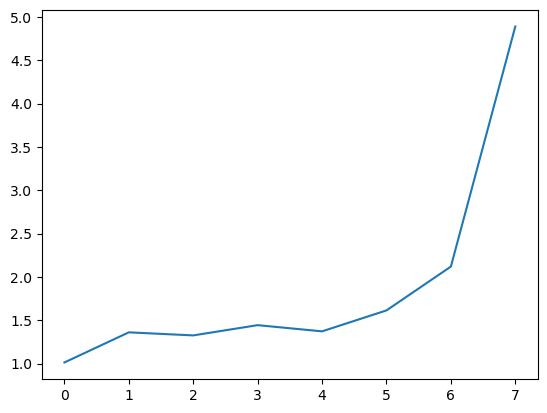

In [ ]:
from matplotlib import pyplot as plt

plt.plot(results['ATTC'])

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.spatial import cKDTree

# Load data
df_ped = pd.read_csv(r"D:\T\test_codeEVT\nd\ped_smooth.csv")
df_car = pd.read_csv(r"D:\T\test_codeEVT\nd\car_smooth.csv")

# 1. Vehicle filtering (remove long stops and slow vehicles)
min_stop_duration = 1.0  # seconds
speed_threshold = 0.08   # m/s for stop detection
min_vehicle_speed = 4.0  # m/s minimum speed requirement

print("Filtering vehicle data...")
df_car['time_diff'] = df_car.groupby('Track ID')['TimeStamp'].diff()
df_car['speed'] = np.hypot(df_car['vx_smooth'], df_car['vy_smooth'])
df_car['is_stopped'] = df_car['speed'] < speed_threshold
stop_groups = (df_car['is_stopped'] != df_car['is_stopped'].shift()).cumsum()
df_car['stop_duration'] = df_car.groupby(['Track ID', stop_groups])['time_diff'].cumsum()

filtered_car = df_car[
    ~((df_car['is_stopped']) & (df_car['stop_duration'] >= min_stop_duration)) & 
    (df_car['speed'] >= min_vehicle_speed)
]
print(f"Filtered from {len(df_car)} to {len(filtered_car)} vehicle records")

# 2. Round timestamps to 0.16s export interval
EXPORT_INTERVAL = 0.16
df_ped['Time_Rounded'] = np.round(df_ped['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL
filtered_car['Time_Rounded'] = np.round(filtered_car['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL

# 3. Bounding box and conflict parameters
PED_BOX = (0.3, 0.3)    # (length, width) in meters
CAR_BOX = (3.72, 1.44)   # Typical sedan dimensions
DIST_THRESH = 1.62       # Initial distance threshold in meters
TIME_BUFFER = 0.16       # ±1 export frame

def get_rotated_corners(x, y, heading, length, width):
    """Calculate rotated bounding box corners using existing HA column"""
    half_l, half_w = length/2, width/2
    corners = np.array([
        [half_l, half_w],   # Front right
        [half_l, -half_w],   # Front left
        [-half_l, -half_w],  # Rear left
        [-half_l, half_w]    # Rear right
    ])
    rad = np.radians(heading)
    rot_mat = np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad), np.cos(rad)]
    ])
    return np.dot(corners, rot_mat.T) + np.array([x, y])

# Main processing
print("\nStarting conflict detection...")
interaction_pairs = set()
all_conflicts = []
unique_ped_ids = df_ped['Track ID'].unique()

print(f"\n{'='*50}")
print(f"Analyzing {len(unique_ped_ids)} pedestrians")

for i, ped_id in enumerate(unique_ped_ids, 1):
    ped = df_ped[df_ped['Track ID'] == ped_id].copy()
    print(f"\nPedestrian {i}/{len(unique_ped_ids)} (ID: {ped_id})")
    print(f"Time range: {ped['Time_Rounded'].min():.2f}s to {ped['Time_Rounded'].max():.2f}s")
    print(f"Frames: {len(ped)}")
    
    # Find temporally proximate cars (moving at least min_vehicle_speed)
    time_window = (ped['Time_Rounded'].min() - TIME_BUFFER,
                  ped['Time_Rounded'].max() + TIME_BUFFER)
    active_cars = filtered_car[
        filtered_car['Time_Rounded'].between(*time_window) & 
        (filtered_car['speed'] >= min_vehicle_speed)
    ]
    nearby_vehicles = active_cars['Track ID'].unique()
    print(f"Nearby vehicles: {len(nearby_vehicles)}")
    
    for car_id in nearby_vehicles:
        car = active_cars[active_cars['Track ID'] == car_id].copy()
        car_speed = car['speed'].mean()
        print(f"  Vehicle {car_id} (avg speed: {car_speed:.2f}m/s)")
        
        conflicts = []
        for _, ped_row in ped.iterrows():
            # Find matching car frames within time buffer
            car_matches = car[
                abs(car['Time_Rounded'] - ped_row['Time_Rounded']) <= TIME_BUFFER
            ]
            
            for _, car_row in car_matches.iterrows():
                center_dist = np.hypot(car_row['x_smooth'] - ped_row['x_smooth'],
                                     car_row['y_smooth'] - ped_row['y_smooth'])
                
                if center_dist <= DIST_THRESH:
                    # Get precise bounding box distances
                    ped_corners = get_rotated_corners(
                        ped_row['x_smooth'], ped_row['y_smooth'],
                        ped_row['HA'], *PED_BOX
                    )
                    car_corners = get_rotated_corners(
                        car_row['x_smooth'], car_row['y_smooth'],
                        car_row['HA'], *CAR_BOX
                    )
                    min_dist = np.min(cdist(ped_corners, car_corners))
                    
                    conflicts.append({
                        'Ped_ID': ped_id,
                        'Car_ID': car_id,
                        'Ped_Time': ped_row['TimeStamp'],
                        'Car_Time': car_row['TimeStamp'],
                        'Time_Diff': car_row['TimeStamp'] - ped_row['TimeStamp'],
                        'Min_Distance': min_dist,
                        'Center_Distance': center_dist,
                        'Car_Speed': car_row['speed']
                    })
        
        if conflicts:
            interaction_pairs.add((ped_id, car_id))
            conflict_df = pd.DataFrame(conflicts).sort_values('Ped_Time')
            
            # Calculate ATTC using time-difference method
            conflict_df['time_diff'] = conflict_df['Ped_Time'].diff()
            conflict_df['dist_diff'] = conflict_df['Min_Distance'].diff()
            conflict_df['closing_rate'] = -conflict_df['dist_diff'] / conflict_df['time_diff']
            conflict_df['ATTC'] = np.where(
                conflict_df['closing_rate'] > 0,
                conflict_df['Min_Distance'] / conflict_df['closing_rate'],
                np.nan
            )
            conflict_df['Movement_Status'] = np.select(
                [conflict_df['closing_rate'] > 0, 
                 conflict_df['closing_rate'] < 0],
                ['Approaching', 'Separating'],
                default='Parallel'
            )
            
            all_conflicts.append(conflict_df)
            print(f"    Found {len(conflicts)} conflict points")

# After your conflict detection loop, modify the results processing like this:

# Convert conflicts list to DataFrame
results = pd.DataFrame(conflicts)

# Calculate ATTC for all points

Filtering vehicle data...
Filtered from 329613 to 23067 vehicle records

Starting conflict detection...

Analyzing 1019 pedestrians

Pedestrian 1/1019 (ID: 24)
Time range: 2.56s to 2.88s
Frames: 4
Nearby vehicles: 1
  Vehicle 20 (avg speed: 14.40m/s)

Pedestrian 2/1019 (ID: 31)
Time range: 8.32s to 9.12s
Frames: 3
Nearby vehicles: 1
  Vehicle 8 (avg speed: 5.46m/s)

Pedestrian 3/1019 (ID: 69)
Time range: 12.64s to 19.04s
Frames: 41
Nearby vehicles: 1
  Vehicle 12 (avg speed: 10.18m/s)

Pedestrian 4/1019 (ID: 97)
Time range: 19.04s to 22.24s
Frames: 21
Nearby vehicles: 1
  Vehicle 77 (avg speed: 4.60m/s)

Pedestrian 5/1019 (ID: 170)
Time range: 44.80s to 64.00s
Frames: 121
Nearby vehicles: 1
  Vehicle 205 (avg speed: 9.60m/s)

Pedestrian 6/1019 (ID: 201)
Time range: 56.48s to 107.52s
Frames: 320
Nearby vehicles: 3
  Vehicle 205 (avg speed: 8.81m/s)
  Vehicle 217 (avg speed: 8.36m/s)
  Vehicle 256 (avg speed: 6.96m/s)


C:\Users\IST LAB 2\AppData\Local\Temp\ipykernel_20364\4049801043.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_car['Time_Rounded'] = np.round(filtered_car['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL



Pedestrian 7/1019 (ID: 215)
Time range: 62.72s to 96.64s
Frames: 213
Nearby vehicles: 3
  Vehicle 205 (avg speed: 5.61m/s)
  Vehicle 217 (avg speed: 8.36m/s)
  Vehicle 256 (avg speed: 6.96m/s)

Pedestrian 8/1019 (ID: 233)
Time range: 73.44s to 105.28s
Frames: 200
Nearby vehicles: 1
  Vehicle 256 (avg speed: 6.96m/s)

Pedestrian 9/1019 (ID: 269)
Time range: 86.56s to 116.64s
Frames: 188
Nearby vehicles: 7
  Vehicle 191 (avg speed: 8.97m/s)
  Vehicle 193 (avg speed: 10.79m/s)
  Vehicle 213 (avg speed: 5.53m/s)
  Vehicle 222 (avg speed: 12.35m/s)
  Vehicle 256 (avg speed: 7.45m/s)
  Vehicle 272 (avg speed: 4.50m/s)
  Vehicle 320 (avg speed: 12.55m/s)

Pedestrian 10/1019 (ID: 282)
Time range: 92.80s to 113.60s
Frames: 131
Nearby vehicles: 4
  Vehicle 191 (avg speed: 7.07m/s)
  Vehicle 193 (avg speed: 10.79m/s)
  Vehicle 222 (avg speed: 5.34m/s)
  Vehicle 256 (avg speed: 6.00m/s)

Pedestrian 11/1019 (ID: 292)
Time range: 97.92s to 122.56s
Frames: 156
Nearby vehicles: 8
  Vehicle 191 (avg s

KeyError: 'Ped_ID'

In [10]:
print(f"Total ATTC values recorded: {len(results[results['Movement_Status'] == 'Approaching'].dropna())}")

Total ATTC values recorded: 32


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Load data
df1 = pd.read_csv(r"D:\T\test_codeEVT\nd\ped_smooth.csv")
df2 = pd.read_csv(r"D:\T\test_codeEVT\nd\moto_smooth.csv")

# Filter specific IDs
ped = df1[df1['Track ID'] == 382].copy()
moto= df2[df2['Track ID'] == 399].copy()
# Round to nearest 0.16s (export interval)
EXPORT_INTERVAL = 0.16
ped['TimeStamp_rounded'] = np.round(ped['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL
moto['TimeStamp_rounded'] = np.round(moto['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL

# Update TIME_BUFFER to match (recommend 0.16s or 0.32s - 1-2 export intervals)
TIME_BUFFER = 0.0  # ±1 export frame

# Calculate heading angles from velocity vectors (in degrees)
def calculate_heading(vx, vy):
    return np.degrees(np.arctan2(vy, vx)) % 360

ped['heading'] = calculate_heading(ped['vx_smooth'], ped['vy_smooth'])
moto['heading'] = calculate_heading(moto['vx_smooth'], moto['vy_smooth'])

# Bounding box dimensions
PED_BOX = (0.3, 0.3)  # (length, width)
moto_BOX = (1.87, 0.64)

# Parameters

DIST_THRESH = 0.9882433   # Initial distance threshold

def get_rotated_corners(x, y, heading, length, width):
    """Calculate rotated bounding box corners"""
    half_l = length / 2
    half_w = width / 2
    
    corners = np.array([
        [ half_l,  half_w],  # Front right
        [ half_l, -half_w],  # Front left
        [-half_l, -half_w],  # Rear left
        [-half_l,  half_w]   # Rear right
    ])
    
    rad = np.radians(heading)
    rot_mat = np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad),  np.cos(rad)]
    ])
    
    rotated = np.dot(corners, rot_mat.T) + np.array([x, y])
    return rotated

conflicts = []

for _, ped_row in ped.iterrows():
    # Temporal proximity check using rounded timestamps
    time_window = (ped_row['TimeStamp_rounded'] - TIME_BUFFER, 
                   ped_row['TimeStamp_rounded'] + TIME_BUFFER)
    
    moto_matches = moto[
        moto['TimeStamp_rounded'].between(*time_window) & 
        (abs(moto['TimeStamp_rounded'] - ped_row['TimeStamp_rounded']) <= TIME_BUFFER)
    ]
    
    for _, moto_row in moto_matches.iterrows():
        # Center-to-center distance check
        center_dist = np.hypot(moto_row['x_smooth'] - ped_row['x_smooth'],
                               moto_row['y_smooth'] - ped_row['y_smooth'])
        
        if center_dist <= DIST_THRESH:
            # Get precise bounding boxes
            ped_corners = get_rotated_corners(
                ped_row['x_smooth'], ped_row['y_smooth'],
                ped_row['heading'], *PED_BOX
            )
            
            moto_corners = get_rotated_corners(
                moto_row['x_smooth'], moto_row['y_smooth'],
                moto_row['heading'], *moto_BOX
            )
            
            # Minimum corner-to-corner distance
            dist_matrix = cdist(ped_corners, moto_corners)
            min_dist = np.min(dist_matrix)
            
            conflicts.append({
                'Ped_Time': ped_row['TimeStamp'],
                'Ped_Time_Rounded': ped_row['TimeStamp_rounded'],
                'moto_Time': moto_row['TimeStamp'],
                'moto_Time_Rounded': moto_row['TimeStamp_rounded'],
                'Time_Diff': moto_row['TimeStamp_rounded'] - ped_row['TimeStamp_rounded'],
                'Center_Distance': center_dist,
                'Min_Corner_Distance': min_dist,
                'Ped_X': ped_row['x_smooth'],
                'Ped_Y': ped_row['y_smooth'],
                'moto_X': moto_row['x_smooth'],
                'moto_Y': moto_row['y_smooth'],
                'moto_Heading': moto_row['heading'],
                'Ped_Heading': ped_row['heading']
            })

# Create results DataFrame
results = pd.DataFrame(conflicts)

# Remove duplicate conflicts (same rounded timestamps)
results = results.drop_duplicates(
    subset=['Ped_Time_Rounded', 'moto_Time_Rounded'], 
    keep='first'
)

if not results.empty:
    print(f"Found {len(results)} conflict points (±{TIME_BUFFER}s, ≤{DIST_THRESH}m):")
    print(results[['Ped_Time_Rounded', 'moto_Time_Rounded', 
                 'Time_Diff', 'Center_Distance', 'Min_Corner_Distance']])
    
    # Save full results
    results.to_csv("conflict_points_rounded_timestamps.csv", index=False)
else:
    print(f"No conflicts found (±{TIME_BUFFER}s, ≤{DIST_THRESH}m)")

Found 6 conflict points (±0.0s, ≤0.9882433m):
   Ped_Time_Rounded  moto_Time_Rounded  Time_Diff  Center_Distance  \
0            128.00             128.00        0.0         0.915500   
1            128.16             128.16        0.0         0.652947   
2            128.32             128.32        0.0         0.451982   
3            128.48             128.48        0.0         0.430231   
4            128.64             128.64        0.0         0.583397   
5            128.80             128.80        0.0         0.831703   

   Min_Corner_Distance  
0             0.215731  
1             0.284875  
2             0.598838  
3             0.617468  
4             0.329547  
5             0.077703  


In [16]:
# Add this right after your existing conflict detection code (before creating results DataFrame)
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Load data
df1 = pd.read_csv(r"D:\T\test_codeEVT\nd\ped_smooth.csv")
df2 = pd.read_csv(r"D:\T\test_codeEVT\nd\moto_smooth.csv")

# Filter specific IDs
ped = df1[df1['Track ID'] == 382].copy()
moto= df2[df2['Track ID'] == 399].copy()
# Round to nearest 0.16s (export interval)
EXPORT_INTERVAL = 0.16
ped['TimeStamp_rounded'] = np.round(ped['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL
moto['TimeStamp_rounded'] = np.round(moto['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL

# Update TIME_BUFFER to match (recommend 0.16s or 0.32s - 1-2 export intervals)
TIME_BUFFER = 0.0  # ±1 export frame

# Calculate heading angles from velocity vectors (in degrees)
def calculate_heading(vx, vy):
    return np.degrees(np.arctan2(vy, vx)) % 360

ped['heading'] = calculate_heading(ped['vx_smooth'], ped['vy_smooth'])
moto['heading'] = calculate_heading(moto['vx_smooth'], moto['vy_smooth'])

# Bounding box dimensions
PED_BOX = (0.3, 0.3)  # (length, width)
moto_BOX = (1.87, 0.64)

# Parameters

DIST_THRESH = 0.9882433   # Initial distance threshold

def get_rotated_corners(x, y, heading, length, width):
    """Calculate rotated bounding box corners"""
    half_l = length / 2
    half_w = width / 2
    
    corners = np.array([
        [ half_l,  half_w],  # Front right
        [ half_l, -half_w],  # Front left
        [-half_l, -half_w],  # Rear left
        [-half_l,  half_w]   # Rear right
    ])
    
    rad = np.radians(heading)
    rot_mat = np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad),  np.cos(rad)]
    ])
    
    rotated = np.dot(corners, rot_mat.T) + np.array([x, y])
    return rotated

conflicts = []

for _, ped_row in ped.iterrows():
    # Temporal proximity check using rounded timestamps
    time_window = (ped_row['TimeStamp_rounded'] - TIME_BUFFER, 
                   ped_row['TimeStamp_rounded'] + TIME_BUFFER)
    
    moto_matches = moto[
        moto['TimeStamp_rounded'].between(*time_window) & 
        (abs(moto['TimeStamp_rounded'] - ped_row['TimeStamp_rounded']) <= TIME_BUFFER)
    ]
    
    for _, moto_row in moto_matches.iterrows():
        # Center-to-center distance check
        center_dist = np.hypot(moto_row['x_smooth'] - ped_row['x_smooth'],
                               moto_row['y_smooth'] - ped_row['y_smooth'])
        
        if center_dist <= DIST_THRESH:
            # Get precise bounding boxes
            ped_corners = get_rotated_corners(
                ped_row['x_smooth'], ped_row['y_smooth'],
                ped_row['heading'], *PED_BOX
            )
            
            moto_corners = get_rotated_corners(
                moto_row['x_smooth'], moto_row['y_smooth'],
                moto_row['heading'], *moto_BOX
            )
            
            # Minimum corner-to-corner distance
            dist_matrix = cdist(ped_corners, moto_corners)
            min_dist = np.min(dist_matrix)
            
            conflicts.append({
                'Ped_Time': ped_row['TimeStamp'],
                'Ped_Time_Rounded': ped_row['TimeStamp_rounded'],
                'moto_Time': moto_row['TimeStamp'],
                'moto_Time_Rounded': moto_row['TimeStamp_rounded'],
                'Time_Diff': moto_row['TimeStamp_rounded'] - ped_row['TimeStamp_rounded'],
                'Center_Distance': center_dist,
                'Min_Corner_Distance': min_dist,
                'Ped_X': ped_row['x_smooth'],
                'Ped_Y': ped_row['y_smooth'],
                'moto_X': moto_row['x_smooth'],
                'moto_Y': moto_row['y_smooth'],
                'moto_Heading': moto_row['heading'],
                'Ped_Heading': ped_row['heading']
            })

# Create results DataFrame
results = pd.DataFrame(conflicts)

# Remove duplicate conflicts (same rounded timestamps)
results = results.drop_duplicates(
    subset=['Ped_Time_Rounded', 'moto_Time_Rounded'], 
    keep='first'
)

if not results.empty:
    print(f"Found {len(results)} conflict points (±{TIME_BUFFER}s, ≤{DIST_THRESH}m):")
    print(results[['Ped_Time_Rounded', 'moto_Time_Rounded', 
                 'Time_Diff', 'Center_Distance', 'Min_Corner_Distance']])
    
    # Save full results
    results.to_csv("conflict_points_rounded_timestamps.csv", index=False)
else:
    print(f"No conflicts found (±{TIME_BUFFER}s, ≤{DIST_THRESH}m)")
def calculate_closing_rate(ped_row, moto_row):
    """Calculate closing rate using vector projection method"""
    # Relative position vector (pedestrian to moto)
    rel_x = ped_row['x_smooth'] - moto_row['x_smooth']
    rel_y = ped_row['y_smooth'] - moto_row['y_smooth']
    distance = np.hypot(rel_x, rel_y)
    
    if distance == 0:
        return 0  # Collision already occurring
    
    # Unit vector in direction of shortest distance
    u_x = rel_x / distance
    u_y = rel_y / distance
    
    # Relative velocity components
    rel_vx = ped_row['vx_smooth'] - moto_row['vx_smooth']
    rel_vy = ped_row['vy_smooth'] - moto_row['vy_smooth']
    
    # Closing rate is negative dot product (positive when closing)
    closing_rate = -(rel_vx * u_x + rel_vy * u_y)
    return closing_rate

# Calculate ATTC for each conflict point
for conflict in conflicts:
    # Find the original rows in the data
    ped_frame = ped[(ped['TimeStamp'] == conflict['Ped_Time'])].iloc[0]
    moto_frame = moto[(moto['TimeStamp'] == conflict['moto_Time'])].iloc[0]
    
    # Calculate closing rate
    closing_rate = calculate_closing_rate(ped_frame, moto_frame)
    
    # Calculate ATTC
    if closing_rate > 0:  # Only when objects are closing
        conflict['Closing_Rate'] = closing_rate
        conflict['ATTC'] = conflict['Min_Corner_Distance'] / closing_rate
    else:
        conflict['Closing_Rate'] = closing_rate
        conflict['ATTC'] = np.inf  # No collision course

# Create results DataFrame with ATTC
results = pd.DataFrame(conflicts)

# Clean up infinite/negative ATTC values
results['ATTC'] = results['ATTC'].replace([np.inf, -np.inf], np.nan)

# Remove duplicate conflicts (same rounded timestamps)
results = results.drop_duplicates(
    subset=['Ped_Time_Rounded', 'moto_Time_Rounded'], 
    keep='first'
)

if not results.empty:
    print(f"\nConflict Points with ATTC (±{TIME_BUFFER}s, ≤{DIST_THRESH}m):")
    print(results[['Ped_Time_Rounded', 'moto_Time_Rounded', 
                 'Min_Corner_Distance', 'Closing_Rate', 'ATTC']].to_string())
    
    # Summary stats
    valid_attc = results['ATTC'].dropna()
    if len(valid_attc) > 0:
        print(f"\nATTC Statistics (seconds):")
        print(f"Min: {valid_attc.min():.2f}, Max: {valid_attc.max():.2f}")
        print(f"Mean: {valid_attc.mean():.2f}, Median: {valid_attc.median():.2f}")
    
    # Save full results
    results.to_csv("conflict_points_with_ATTC.csv", index=False)
else:
    print(f"No conflicts found (±{TIME_BUFFER}s, ≤{DIST_THRESH}m)")

Found 6 conflict points (±0.0s, ≤0.9882433m):
   Ped_Time_Rounded  moto_Time_Rounded  Time_Diff  Center_Distance  \
0            128.00             128.00        0.0         0.915500   
1            128.16             128.16        0.0         0.652947   
2            128.32             128.32        0.0         0.451982   
3            128.48             128.48        0.0         0.430231   
4            128.64             128.64        0.0         0.583397   
5            128.80             128.80        0.0         0.831703   

   Min_Corner_Distance  
0             0.215731  
1             0.284875  
2             0.598838  
3             0.617468  
4             0.329547  
5             0.077703  

Conflict Points with ATTC (±0.0s, ≤0.9882433m):
   Ped_Time_Rounded  moto_Time_Rounded  Min_Corner_Distance  Closing_Rate      ATTC
0            128.00             128.00             0.215731      1.484802  0.145293
1            128.16             128.16             0.284875      1.5627

# ATTC_ PPT

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Load data
df1 = pd.read_csv(r"D:\T\test_codeEVT\nd\ped_smooth.csv").head(10000)
df2 = pd.read_csv(r"D:\T\test_codeEVT\nd\moto_smooth.csv").head(10000)

# Round to nearest 0.16s (export interval)
EXPORT_INTERVAL = 0.16
df1['TimeStamp_rounded'] = np.round(df1['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL
df2['TimeStamp_rounded'] = np.round(df2['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL

# Time buffer for matching
TIME_BUFFER = 0.0  # ±1 export frame

# Calculate heading angles from velocity vectors (in degrees)
def calculate_heading(vx, vy):
    return np.degrees(np.arctan2(vy, vx)) % 360

df1['heading'] = calculate_heading(df1['vx_smooth'], df1['vy_smooth'])
df2['heading'] = calculate_heading(df2['vx_smooth'], df2['vy_smooth'])

# Bounding box dimensions
PED_BOX = (0.3, 0.3)  # (length, width)
MOTO_BOX = (1.87, 0.64)

# Distance threshold
DIST_THRESH = 1.2

def get_rotated_corners(x, y, heading, length, width):
    """Calculate rotated bounding box corners"""
    half_l = length / 2
    half_w = width / 2
    
    corners = np.array([
        [ half_l,  half_w],  # Front right
        [ half_l, -half_w],  # Front left
        [-half_l, -half_w],  # Rear left
        [-half_l,  half_w]   # Rear right
    ])
    
    rad = np.radians(heading)
    rot_mat = np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad),  np.cos(rad)]
    ])
    
    rotated = np.dot(corners, rot_mat.T) + np.array([x, y])
    return rotated

def calculate_closing_rate(ped_row, moto_row):
    """Calculate closing rate using vector projection method"""
    # Relative position vector (pedestrian to moto)
    rel_x = ped_row['x_smooth'] - moto_row['x_smooth']
    rel_y = ped_row['y_smooth'] - moto_row['y_smooth']
    distance = np.hypot(rel_x, rel_y)
    
    if distance == 0:
        return 0  # Collision already occurring
    
    # Unit vector in direction of shortest distance
    u_x = rel_x / distance
    u_y = rel_y / distance
    
    # Relative velocity components
    rel_vx = ped_row['vx_smooth'] - moto_row['vx_smooth']
    rel_vy = ped_row['vy_smooth'] - moto_row['vy_smooth']
    
    # Closing rate is negative dot product (positive when closing)
    closing_rate = -(rel_vx * u_x + rel_vy * u_y)
    return closing_rate

# Get all unique pedestrian and motorcycle IDs
ped_ids = df1['Track ID'].unique()
moto_ids = df2['Track ID'].unique()

all_conflicts = []

# Iterate through all pedestrian-motorcycle pairs
for ped_id in ped_ids:
    ped = df1[df1['Track ID'] == ped_id].copy()
    
    for moto_id in moto_ids:
        moto = df2[df2['Track ID'] == moto_id].copy()
        
        conflicts = []
        
        for _, ped_row in ped.iterrows():
            # Temporal proximity check using rounded timestamps
            time_window = (ped_row['TimeStamp_rounded'] - TIME_BUFFER, 
                          ped_row['TimeStamp_rounded'] + TIME_BUFFER)
            
            moto_matches = moto[
                moto['TimeStamp_rounded'].between(*time_window) & 
                (abs(moto['TimeStamp_rounded'] - ped_row['TimeStamp_rounded']) <= TIME_BUFFER)
            ]
            
            for _, moto_row in moto_matches.iterrows():
                # Center-to-center distance check
                center_dist = np.hypot(moto_row['x_smooth'] - ped_row['x_smooth'],
                                      moto_row['y_smooth'] - ped_row['y_smooth'])
                
                if center_dist <= DIST_THRESH:
                    # Get precise bounding boxes
                    ped_corners = get_rotated_corners(
                        ped_row['x_smooth'], ped_row['y_smooth'],
                        ped_row['heading'], *PED_BOX
                    )
                    
                    moto_corners = get_rotated_corners(
                        moto_row['x_smooth'], moto_row['y_smooth'],
                        moto_row['heading'], *MOTO_BOX
                    )
                    
                    # Minimum corner-to-corner distance
                    dist_matrix = cdist(ped_corners, moto_corners)
                    min_dist = np.min(dist_matrix)
                    
                    # Calculate closing rate and ATTC
                    closing_rate = calculate_closing_rate(ped_row, moto_row)
                    attc = min_dist / closing_rate if closing_rate > 0 else np.inf
                    
                    conflicts.append({
                        'Ped_ID': ped_id,
                        'Moto_ID': moto_id,
                        'Ped_Time': ped_row['TimeStamp'],
                        'Ped_Time_Rounded': ped_row['TimeStamp_rounded'],
                        'Moto_Time': moto_row['TimeStamp'],
                        'Moto_Time_Rounded': moto_row['TimeStamp_rounded'],
                        'Time_Diff': moto_row['TimeStamp_rounded'] - ped_row['TimeStamp_rounded'],
                        'Center_Distance': center_dist,
                        'Min_Corner_Distance': min_dist,
                        'Closing_Rate': closing_rate,
                        'ATTC': attc,
                        'Ped_X': ped_row['x_smooth'],
                        'Ped_Y': ped_row['y_smooth'],
                        'Moto_X': moto_row['x_smooth'],
                        'Moto_Y': moto_row['y_smooth'],
                        'Moto_Heading': moto_row['heading'],
                        'Ped_Heading': ped_row['heading']
                    })
        
        if conflicts:
            # Remove duplicate conflicts (same rounded timestamps)
            conflict_df = pd.DataFrame(conflicts).drop_duplicates(
                subset=['Ped_Time_Rounded', 'Moto_Time_Rounded'], 
                keep='first'
            )
            all_conflicts.append(conflict_df)

# Combine all conflicts into one DataFrame
if all_conflicts:
    results = pd.concat(all_conflicts, ignore_index=True)
    
    # Clean up infinite/negative ATTC values
    results['ATTC'] = results['ATTC'].replace([np.inf, -np.inf], np.nan)
    
    # Filter for near-miss events (you can adjust the criteria as needed)
    near_miss = results[(results['Min_Corner_Distance'] < 1.0) & (results['ATTC'] < 5.0)]
    
    print(f"Found {len(near_miss)} near-miss events:")
    print(near_miss[['Ped_ID', 'Moto_ID', 'Ped_Time_Rounded', 
                    'Min_Corner_Distance', 'ATTC']].to_string())

    
    # Summary statistics
    print("\nSummary Statistics for Near-Miss Events:")
    print(f"Number of unique pedestrian IDs involved: {near_miss['Ped_ID'].nunique()}")
    print(f"Number of unique motorcycle IDs involved: {near_miss['Moto_ID'].nunique()}")
    print("\nATTC Statistics (seconds):")
    print(near_miss['ATTC'].describe())
else:
    print("No conflicts found between any pedestrian-motorcycle pairs")

Found 60 near-miss events:
     Ped_ID  Moto_ID  Ped_Time_Rounded  Min_Corner_Distance      ATTC
7       215      155             94.72             0.542432  1.827678
12      215      178             94.56             0.975333  2.748274
15      215      178             95.04             0.942794  2.173105
16      215      178             95.20             0.851759  2.005079
17      215      178             95.36             0.766784  1.717634
18      215      178             95.52             0.686624  1.560453
19      215      178             95.68             0.616504  1.319265
20      215      178             95.84             0.564149  1.213705
21      215      178             96.00             0.505464  1.316657
22      215      178             96.16             0.454610  1.483879
23      215      178             96.32             0.407302  2.900270
26      282      302            106.56             0.183095  0.072306
27      282      302            106.88             0.152890  0.

# Trial APP

In [1]:
# Add this right after your existing conflict detection code (before creating results DataFrame)
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Load data
df1 = pd.read_csv(r"D:\T\test_codeEVT\nd\ped_smooth.csv")
df2 = pd.read_csv(r"D:\T\test_codeEVT\nd\moto_smooth.csv")

# Filter specific IDs
ped = df1[df1['Track ID'] == 382].copy()
moto= df2[df2['Track ID'] == 399].copy()
# Round to nearest 0.16s (export interval)
EXPORT_INTERVAL = 0.16
ped['TimeStamp_rounded'] = np.round(ped['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL
moto['TimeStamp_rounded'] = np.round(moto['TimeStamp'] / EXPORT_INTERVAL) * EXPORT_INTERVAL

# Update TIME_BUFFER to match (recommend 0.16s or 0.32s - 1-2 export intervals)
TIME_BUFFER = 0.0  # ±1 export frame

# Calculate heading angles from velocity vectors (in degrees)
def calculate_heading(vx, vy):
    return np.degrees(np.arctan2(vy, vx)) % 360

ped['heading'] = calculate_heading(ped['vx_smooth'], ped['vy_smooth'])
moto['heading'] = calculate_heading(moto['vx_smooth'], moto['vy_smooth'])

# Bounding box dimensions
PED_BOX = (0.3, 0.3)  # (length, width)
moto_BOX = (1.87, 0.64)

# Parameters

DIST_THRESH = 0.9882433   # Initial distance threshold

def get_rotated_corners(x, y, heading, length, width):
    """Calculate rotated bounding box corners"""
    half_l = length / 2
    half_w = width / 2
    
    corners = np.array([
        [ half_l,  half_w],  # Front right
        [ half_l, -half_w],  # Front left
        [-half_l, -half_w],  # Rear left
        [-half_l,  half_w]   # Rear right
    ])
    
    rad = np.radians(heading)
    rot_mat = np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad),  np.cos(rad)]
    ])
    
    rotated = np.dot(corners, rot_mat.T) + np.array([x, y])
    return rotated

conflicts = []

for _, ped_row in ped.iterrows():
    # Temporal proximity check using rounded timestamps
    time_window = (ped_row['TimeStamp_rounded'] - TIME_BUFFER, 
                   ped_row['TimeStamp_rounded'] + TIME_BUFFER)
    
    moto_matches = moto[
        moto['TimeStamp_rounded'].between(*time_window) & 
        (abs(moto['TimeStamp_rounded'] - ped_row['TimeStamp_rounded']) <= TIME_BUFFER)
    ]
    
    for _, moto_row in moto_matches.iterrows():
        # Center-to-center distance check
        center_dist = np.hypot(moto_row['x_smooth'] - ped_row['x_smooth'],
                               moto_row['y_smooth'] - ped_row['y_smooth'])
        
        if center_dist <= DIST_THRESH:
            # Get precise bounding boxes
            ped_corners = get_rotated_corners(
                ped_row['x_smooth'], ped_row['y_smooth'],
                ped_row['heading'], *PED_BOX
            )
            
            moto_corners = get_rotated_corners(
                moto_row['x_smooth'], moto_row['y_smooth'],
                moto_row['heading'], *moto_BOX
            )
            
            # Minimum corner-to-corner distance
            dist_matrix = cdist(ped_corners, moto_corners)
            min_dist = np.min(dist_matrix)
            
            conflicts.append({
                'Ped_Time': ped_row['TimeStamp'],
                'Ped_Time_Rounded': ped_row['TimeStamp_rounded'],
                'moto_Time': moto_row['TimeStamp'],
                'moto_Time_Rounded': moto_row['TimeStamp_rounded'],
                'Time_Diff': moto_row['TimeStamp_rounded'] - ped_row['TimeStamp_rounded'],
                'Center_Distance': center_dist,
                'Min_Corner_Distance': min_dist,
                'Ped_X': ped_row['x_smooth'],
                'Ped_Y': ped_row['y_smooth'],
                'moto_X': moto_row['x_smooth'],
                'moto_Y': moto_row['y_smooth'],
                'moto_Heading': moto_row['heading'],
                'Ped_Heading': ped_row['heading']
            })

# Create results DataFrame
results = pd.DataFrame(conflicts)

# Remove duplicate conflicts (same rounded timestamps)
results = results.drop_duplicates(
    subset=['Ped_Time_Rounded', 'moto_Time_Rounded'], 
    keep='first'
)

if not results.empty:
    print(f"Found {len(results)} conflict points (±{TIME_BUFFER}s, ≤{DIST_THRESH}m):")
    print(results[['Ped_Time_Rounded', 'moto_Time_Rounded', 
                 'Time_Diff', 'Center_Distance', 'Min_Corner_Distance']])
    
    # Save full results
    results.to_csv("conflict_points_rounded_timestamps.csv", index=False)
else:
    print(f"No conflicts found (±{TIME_BUFFER}s, ≤{DIST_THRESH}m)")
def calculate_closing_rate(ped_row, moto_row):
    """Calculate closing rate using vector projection method"""
    # Relative position vector (pedestrian to moto)
    rel_x = ped_row['x_smooth'] - moto_row['x_smooth']
    rel_y = ped_row['y_smooth'] - moto_row['y_smooth']
    distance = np.hypot(rel_x, rel_y)
    
    if distance == 0:
        return 0  # Collision already occurring
    
    # Unit vector in direction of shortest distance
    u_x = rel_x / distance
    u_y = rel_y / distance
    
    # Relative velocity components
    rel_vx = ped_row['vx_smooth'] - moto_row['vx_smooth']
    rel_vy = ped_row['vy_smooth'] - moto_row['vy_smooth']
    
    # Closing rate is negative dot product (positive when closing)
    closing_rate = -(rel_vx * u_x + rel_vy * u_y)
    return closing_rate

# Calculate ATTC for each conflict point
for conflict in conflicts:
    # Find the original rows in the data
    ped_frame = ped[(ped['TimeStamp'] == conflict['Ped_Time'])].iloc[0]
    moto_frame = moto[(moto['TimeStamp'] == conflict['moto_Time'])].iloc[0]
    
    # Calculate closing rate
    closing_rate = calculate_closing_rate(ped_frame, moto_frame)
    
    # Calculate ATTC
    if closing_rate > 0:  # Only when objects are closing
        conflict['Closing_Rate'] = closing_rate
        conflict['ATTC'] = conflict['Center_Distance'] / closing_rate
    else:
        conflict['Closing_Rate'] = closing_rate
        conflict['ATTC'] = np.inf  # No collision course

# Create results DataFrame with ATTC
results = pd.DataFrame(conflicts)

# Clean up infinite/negative ATTC values
results['ATTC'] = results['ATTC'].replace([np.inf, -np.inf], np.nan)

# Remove duplicate conflicts (same rounded timestamps)
results = results.drop_duplicates(
    subset=['Ped_Time_Rounded', 'moto_Time_Rounded'], 
    keep='first'
)

if not results.empty:
    print(f"\nConflict Points with ATTC (±{TIME_BUFFER}s, ≤{DIST_THRESH}m):")
    print(results[['Ped_Time_Rounded', 'moto_Time_Rounded', 
                 'Min_Corner_Distance', 'Closing_Rate', 'ATTC']].to_string())
    
    # Summary stats
    valid_attc = results['ATTC'].dropna()
    if len(valid_attc) > 0:
        print(f"\nATTC Statistics (seconds):")
        print(f"Min: {valid_attc.min():.2f}, Max: {valid_attc.max():.2f}")
        print(f"Mean: {valid_attc.mean():.2f}, Median: {valid_attc.median():.2f}")
    
    # Save full results
    results.to_csv("conflict_points_with_ATTC.csv", index=False)
else:
    print(f"No conflicts found (±{TIME_BUFFER}s, ≤{DIST_THRESH}m)")

Found 6 conflict points (±0.0s, ≤0.9882433m):
   Ped_Time_Rounded  moto_Time_Rounded  Time_Diff  Center_Distance  \
0            128.00             128.00        0.0         0.915500   
1            128.16             128.16        0.0         0.652947   
2            128.32             128.32        0.0         0.451982   
3            128.48             128.48        0.0         0.430231   
4            128.64             128.64        0.0         0.583397   
5            128.80             128.80        0.0         0.831703   

   Min_Corner_Distance  
0             0.215731  
1             0.284875  
2             0.598838  
3             0.617468  
4             0.329547  
5             0.077703  

Conflict Points with ATTC (±0.0s, ≤0.9882433m):
   Ped_Time_Rounded  moto_Time_Rounded  Min_Corner_Distance  Closing_Rate      ATTC
0            128.00             128.00             0.215731      1.484802  0.616581
1            128.16             128.16             0.284875      1.5627